In [1]:
import pandas
import src.extraction as extract
import src.cleaning as clean
import src.visualizing as viz
import src.model as model
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [20]:
#importing dataset
df = extract.get_dataframe("goodreads_books")

In [3]:
#df_clean = clean.basic_clean(df)

In [4]:
#clean.save_dataframe(df_clean,"books_clean")

In [5]:
#df = extract.get_dataframe("books_clean")

In [6]:
#df_model = clean.prep_model(df)


In [7]:
#df_model.head()


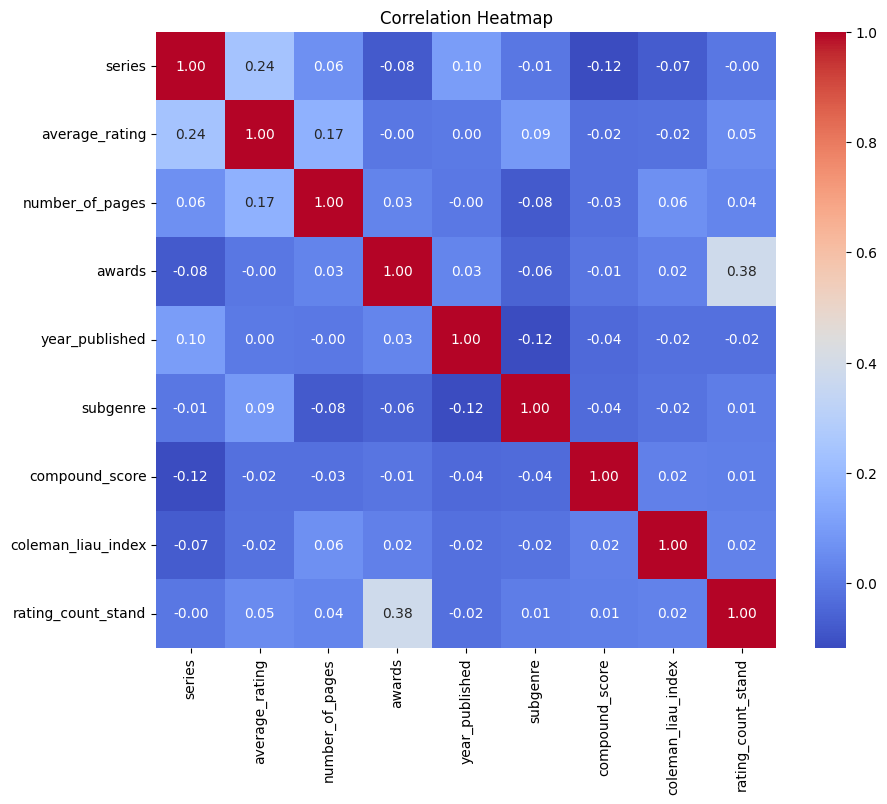

In [2]:
df_model = extract.get_dataframe("model_prep")
viz.matrix_corr(df_model)

In [9]:
#clean.save_dataframe(df_model,"model_prep")


In [13]:
my_data = extract.get_dataframe("my_books")

In [14]:
my_data = clean.prep_my_data(my_data)

In [12]:
#viz.elbow_method(df_model)


In [13]:
#viz.silhouette_plot(df_model)

In [14]:

#viz.davies_boulding_plot(df_model)

In [3]:
k = 7  # Number of clusters chosen
kmeans = KMeans(n_clusters=k, init='k-means++')
kmeans.fit(df_model)
centroids = kmeans.cluster_centers_

c:\Users\PaulaMachado\miniconda3\envs\ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [4]:
clusters = []
for _, point in df_model.iterrows():
    if point.isnull().any():  # Skip data points with missing values
        continue
    distances = []
    for centroid in centroids:
        if np.isnan(centroid).any():  # Skip centroids with missing values
            continue
        distance = np.sqrt(np.sum((np.array(point) - np.array(centroid)) ** 2))  # Euclidean distance calculation
        distances.append(distance)
    if distances:  # Check if distances list is not empty
        closest_cluster = np.argmin(distances)  # Index of the centroid with the smallest distance
        clusters.append(closest_cluster)

# 'clusters' now contains the cluster assignments for each data point


In [5]:

updated_centroids = []
for cluster_id in range(k):  # K represents the number of clusters
    cluster_points = df_model.iloc[np.where(clusters == cluster_id)[0]]  # Filter data points for the current cluster
    centroid = cluster_points.mean(axis=0)  # Calculate the mean along each feature axis
    updated_centroids.append(centroid)

In [6]:
n_samples = len(df_model)
X = df_model.values

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
print(X)
cluster_labels = kmeans.labels_
"""
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='magma')
plt.title("Data Points - sample")
plt.savefig('image/plots/Data_points_full.png')
plt.show()
"""

c:\Users\PaulaMachado\miniconda3\envs\ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[True 4.03 220.0 ... 0.4678 6.91 -0.0998568075555052]
 [True 4.35 400.0 ... 0.0 11.53 -0.1290873678482924]
 [True 4.23 320.0 ... 0.9455 8.07 -0.1110513082644749]
 ...
 [False 3.87 312.0 ... -0.1646 7.2 -0.051127804469402]
 [False 4.17 264.0 ... -0.9136 10.06 -0.1512882263971734]
 [True 4.09 240.0 ... -0.6705 6.96 -0.0894405341685495]]


'\nplt.figure(figsize=(10, 6))\nplt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap=\'magma\')\nplt.title("Data Points - sample")\nplt.savefig(\'image/plots/Data_points_full.png\')\nplt.show()\n'

In [7]:
    # --- Initializing Centroids as Random Points from Data --- 
    init_centroids = np.random.choice(range(n_samples), size=k, replace=False)

    centroid_dict = {}
    for i, c in zip(range(k), init_centroids):
        centroid_dict[i] = X[c]

    cluster_dict = {}
    for i in range(k):
        cluster_dict[i] = []

In [8]:

# --- Training--- 
centroid_dict, cluster_dict, epoch = model.train(centroid_dict, cluster_dict, X)
"""
# --- Plotting Results --- 
viz.plot_results(centroid_dict, cluster_dict, X, epoch)
"""

'\n# --- Plotting Results --- \nviz.plot_results(centroid_dict, cluster_dict, X, epoch)\n'

In [21]:
df_model.head()

,series,average_rating,number_of_pages,awards,year_published,subgenre,compound_score,coleman_liau_index,rating_count_stand
0,True,4.03,220.0,0,2007,3,0.4678,6.91,-0.099857
1,True,4.35,400.0,0,2006,0,0.0000,11.53,-0.129087
2,True,4.23,320.0,0,2009,0,0.9455,8.07,-0.111051
3,True,4.01,464.0,0,1997,4,0.0000,0.00,0.163415
4,False,4.05,252.0,0,1966,2,-0.6156,9.58,-0.083257


In [12]:

my_data.info()


NameError: name 'my_data' is not defined

In [15]:
clean.save_dataframe(my_data, "my_prep")
new_data_point = my_data.iloc[9].values.tolist()

In [18]:
nearest_point = model.predict_and_find_nearest(centroid_dict, cluster_dict, new_data_point)
nearest_point

224

In [39]:
nearest_point = find_nearest_point(centroid_dict, cluster_dict, predicted_cluster_index, new_data_point)
print(nearest_point)

241


In [21]:
df.iloc[nearest_point]

id                                                                     1878
title                     The History of Sexuality, Volume 2: The Use of...
link                      https://www.goodreads.com//book/show/1878.The_...
series                                        (The History of Sexuality #2)
cover_link                https://i.gr-assets.com/images/S/compressed.ph...
author                                       Michel Foucault, Robert Hurley
author_link               https://www.goodreads.com/author/show/1260.Mic...
rating_count                                                           3358
review_count                                                            102
average_rating                                                         4.07
five_star_ratings                                                      1244
four_star_ratings                                                      1310
three_star_ratings                                                      645
two_star_rat